In [28]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [141]:
# Load the dataset

df = pd.read_csv(r'C:\Users\anant\OneDrive\Desktop\MBAN\MBAN 6110\Datasets\Final Presentation\train.csv')

C:\Users\anant\AppData\Local\Temp\ipykernel_26108\2144700389.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\anant\OneDrive\Desktop\MBAN\MBAN 6110\Datasets\Final Presentation\train.csv')


In [142]:
# Display the first few rows of the dataset

df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [77]:
# Columns in the dataset

df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Mortgage Loan', 'Payday Loan',
       'Credit-Builder Loan', 'Auto Loan', 'Debt Consolidation Loan',
       'No Loan', 'Personal Loan', 'Student Loan', 'Other', 'Home Equity Loan',
       'Total_Age_in_Months'],
      dtype='object')

### Objectives


1. **Predicting Credit Score**: Develop a model to accurately predict an individual's credit score based on various attributes.
2. **Identify Key Factors**: Understand the most influential factors that contribute to a person's credit score.
3. **Risk Assessment**: Enable financial institutions to assess the risk level associated with lending to a particular individual.
4. **Personalized Offerings**: Facilitate the creation of tailored financial products and services based on a person's creditworthiness.

### Hypothesis


1. **Demographic Factors**: Age, occupation, and marital status may influence a person's ability to manage credit responsibly.
2. **Financial Behavior**: Payment history, outstanding debt, and investment habits might be strong predictors of credit scores.
3. **Credit Utilization**: The ratio of credit used to available credit might be inversely related to the credit score.
4. **Credit Inquiries**: Frequent credit inquiries might be associated with higher credit-seeking behavior, potentially lowering the credit score.

In [4]:
# Check for missing values

df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [5]:
# Check unique values in each categorical column

df.select_dtypes(include=['object']).nunique()

ID                         100000
Customer_ID                 12500
Month                           8
Name                        10139
Age                          1788
SSN                         12501
Occupation                     16
Annual_Income               18940
Num_of_Loan                   434
Type_of_Loan                 6260
Num_of_Delayed_Payment        749
Changed_Credit_Limit         3635
Credit_Mix                      4
Outstanding_Debt            13178
Credit_History_Age            404
Payment_of_Min_Amount           3
Amount_invested_monthly     91049
Payment_Behaviour               7
Monthly_Balance             98790
Credit_Score                    3
dtype: int64

In [6]:
# Get descriptive statistics for each numerical column

df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


- Monthly_Inhand_Salary: The average monthly salary is around 4194, with a standard deviation of 3183. The minimum value is 303, while the maximum is 15204. However, about 15% of the data in this column is missing.

- Num_Bank_Accounts: The average number of bank accounts is around 17, but the standard deviation is quite large (117), indicating a high degree of variability in this data. The minimum value is -1, which may be an error as the number of bank accounts cannot be negative.

- Num_Credit_Card: The average number of credit cards is approximately 22, with a standard deviation of 129. The minimum value is 0 and the maximum value is 1499, which seems unusually high and may indicate outliers or errors in the data.

- Interest_Rate: The average interest rate is about 72.5, with a standard deviation of 466.4. The minimum value is 1, while the maximum is 5797, which seems unusually high and might be an outlier or error.

- Delay_from_due_date: The average delay from the due date is around 21 days, with a standard deviation of about 15 days. The minimum value is -5, which may be an error as delays cannot be negative. Or it was paid earlier than the due date. We will check this later on.

- Num_Credit_Inquiries: The average number of credit inquiries is about 28, with a standard deviation of 193. The minimum value is 0, while the maximum value is 2597, which is unusually high and might indicate outliers or errors in the data.

- Credit_Utilization_Ratio: The average credit utilization ratio is about 32.3, with a standard deviation of approximately 5.1. The values range from 20 to 50.

- Total_EMI_per_month: The average total EMI per month is approximately 1403, with a standard deviation of 8306. The minimum value is 0, while the maximum value is 82331, which seems unusually high and may indicate outliers or errors in the data.

### Data Cleaning and Processing 

However, before we move on, there are some numerical columns that even though they look numerical, they come out as objects. This could possibly indicate that there are erroneous values in the column. They have been dealt with below.

If we skim through the dataset, we see that records repeat for each customer and vary across months. So to fill in missing/erroneous data, we can leverage the information available for each customer.

In [143]:
# Convert Age column to numeric and fill in missing or erroneous ages

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].apply(lambda x: x if 0 < x < 100 else None)
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))

In [144]:
# Fill in missing customer names

df['Name'] = df.groupby('Customer_ID')['Name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [145]:
# Fill in missing occupations

df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

Similarly, for numerical columns, there are values where instances where values are prefixed or suffixed by "_". Let's first clean these columns and then we'll convert them into numerical columns. Once that happens, we'll remove/replace erroneous values

In [146]:
# Clean and convert a list of numerical columns

num_cols = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
            'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 
            'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
            'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


for column in num_cols:
    df[column] = df[column].replace('[^0-9.]','', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [147]:
# Count the number of unique annual incomes and monthly salaries for each customer

unique_annual_incomes = df.groupby('Customer_ID')['Annual_Income'].nunique()
unique_monthly_salaries = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].nunique()

print(unique_annual_incomes, unique_monthly_salaries )

Customer_ID
CUS_0x1000    2
CUS_0x1009    2
CUS_0x100b    1
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     1
CUS_0xff4     2
CUS_0xff6     1
CUS_0xffc     1
CUS_0xffd     2
Name: Annual_Income, Length: 12500, dtype: int64 Customer_ID
CUS_0x1000    1
CUS_0x1009    1
CUS_0x100b    1
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     1
CUS_0xff4     1
CUS_0xff6     1
CUS_0xffc     1
CUS_0xffd     1
Name: Monthly_Inhand_Salary, Length: 12500, dtype: int64


- For Annual_Income, some customers have more than one unique value. This could indicate changes in income over the six months covered by the dataset, possibly due to changes in employment or errors in the data.
- For Monthly_Inhand_Salary, most customers have one unique value. This suggests that for most customers, the monthly salary does not change over the six months covered by the dataset. However, there are still some customers for whom this value varies.

In [148]:
# Clean and convert Annual_Income and Monthly_Inhand_Salary columns

for column in ['Annual_Income', 'Monthly_Inhand_Salary']:
    df[column] = df[column].replace('[^0-9.]','', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

- Now, since we have observed that there might be different values for Annual Income and Monthly income per Customer, this could be because of a change in employment. 
- To ensure that values are consistent, if the occupation has not changed, and the annual income changes, then we will replace it with the mode based on Customer ID. 
- However if Occupation has changed, then we will replace it for the month and the subsequent months. 

In [149]:
# Fill in missing or changed Annual_Income based on Customer ID and Occupation

mode_annual_income = df.groupby('Customer_ID')['Annual_Income'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
mode_annual_income.columns = ['Customer_ID', 'Mode_Annual_Income']

df = pd.merge(df, mode_annual_income, on='Customer_ID', how='left')

df.loc[(df['Annual_Income'].isna()) & (df['Occupation'] == df['Occupation'].shift()), 'Annual_Income'] = df['Mode_Annual_Income']
df.loc[(df['Annual_Income'].isna()) & (df['Occupation'] != df['Occupation'].shift()), 'Annual_Income'] = df['Annual_Income'].fillna(method='ffill')

df.drop('Mode_Annual_Income', axis=1, inplace=True)

In [150]:
# Fill in missing Monthly_Inhand_Salary based on Customer ID

mode_monthly_salary = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
mode_monthly_salary.columns = ['Customer_ID', 'Mode_Monthly_Salary']

df = pd.merge(df, mode_monthly_salary, on='Customer_ID', how='left')

df.loc[df['Monthly_Inhand_Salary'].isna(), 'Monthly_Inhand_Salary'] = df['Mode_Monthly_Salary']

df.drop('Mode_Monthly_Salary', axis=1, inplace=True)

Now, the Type of Loan column has a list of Loans per customer. But this is of no use to use as is, instead we'll split each value in the column to create individual columns for each type of Loan, with a flag (0/1) as an indicator, and if the customer has no loans, then we'll replace it with No Loan  

In [151]:
# Clean Type_of_Loan column

df['Type_of_Loan'] = df.groupby('Customer_ID')['Type_of_Loan'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "No Loan"))
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: [i.strip() for i in x.replace("and", ",").split(",") if i.strip()])

for loan in set([j for i in df['Type_of_Loan'].tolist() for j in i]):
    df[loan] = df['Type_of_Loan'].apply(lambda x: 1 if loan in x else 0)

In [152]:
# Rename 'Not Specified' column to 'Other'

df.rename(columns={'Not Specified': 'Other'}, inplace=True)

In [153]:
# Clean Credit_Mix column

df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

The Credit History Age column indicates how long the customer has had a credit history, but as a string. To ensure that this column can be used, we'll convert it into Months.

In [154]:
# Split Credit_History_Age into years and months, calculate the total age in months, and handle missing values

df[['Years', 'Months']] = df['Credit_History_Age'].str.split(' and ', expand=True)
df['Years'] = df['Years'].str.replace(' Years', '').astype(float)
df['Months'] = df['Months'].str.replace(' Months', '').astype(float)
df['Total_Age_in_Months'] = df['Years']*12 + df['Months']

# Convert Total_Age_in_Months to float

df['Total_Age_in_Months'] = df['Total_Age_in_Months'].astype(float)

In [ ]:
# Interpolate missing values

df['Total_Age_in_Months'] = df.groupby('Customer_ID')['Total_Age_in_Months'].apply(lambda group: group.interpolate()).reset_index(level=0, drop=True)

# Drop columns

df.drop(['Years', 'Months', 'Credit_History_Age'], axis=1, inplace=True)

In [155]:
# For each numerical column, identify the unique values and their frequencies

unique_values = {column: df.groupby('Customer_ID')[column].nunique() for column in num_cols}

In [156]:
# Identify the columns with erroneous values, i.e., those with more than one unique value per customer ID

erroneous_columns = [column for column in unique_values if any(unique_values[column] > 1)]

In [157]:
# Replace erroneous values in each column with the mode of the customer ID, this is to replace erroneous values that could exist

for column in erroneous_columns:
    mode_values = df.groupby('Customer_ID')[column].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
    mode_values.columns = ['Customer_ID', 'Mode_Value']
    df = pd.merge(df, mode_values, on='Customer_ID', how='left')
    df.loc[df[column] != df['Mode_Value'], column] = df['Mode_Value']
    df.drop('Mode_Value', axis=1, inplace=True)

In [158]:
# Payment_Behaviour - Replacing erroneous values with the mode of the customer ID

mode_values = df.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
mode_values.columns = ['Customer_ID', 'Mode_Value']
df = pd.merge(df, mode_values, on='Customer_ID', how='left')
df.loc[df['Payment_Behaviour'] != df['Mode_Value'], 'Payment_Behaviour'] = df['Mode_Value']
df.drop('Mode_Value', axis=1, inplace=True)

In [159]:
# Count the number of unique 'Payment_Behaviour' values for each 'Customer_ID'

payment_behaviour_counts = df.groupby('Customer_ID')['Payment_Behaviour'].nunique().reset_index()

# Flag customers with more than one unique payment behavior

payment_behaviour_counts['More_Than_One'] = payment_behaviour_counts['Payment_Behaviour'] > 1

In [160]:
# Summary statistics

summary_stats = payment_behaviour_counts['More_Than_One'].value_counts().reset_index()
summary_stats.columns = ['Has_More_Than_One_Payment_Behaviour', 'Number_of_Customers']
summary_stats['Percentage'] = (summary_stats['Number_of_Customers'] / summary_stats['Number_of_Customers'].sum()) * 100

# Customer with more than one payment behavior 

payment_behaviour_counts[payment_behaviour_counts['More_Than_One'] == True].head()

,Customer_ID,Payment_Behaviour,More_Than_One


In [161]:
df_cleaned = df.copy()

### EDA

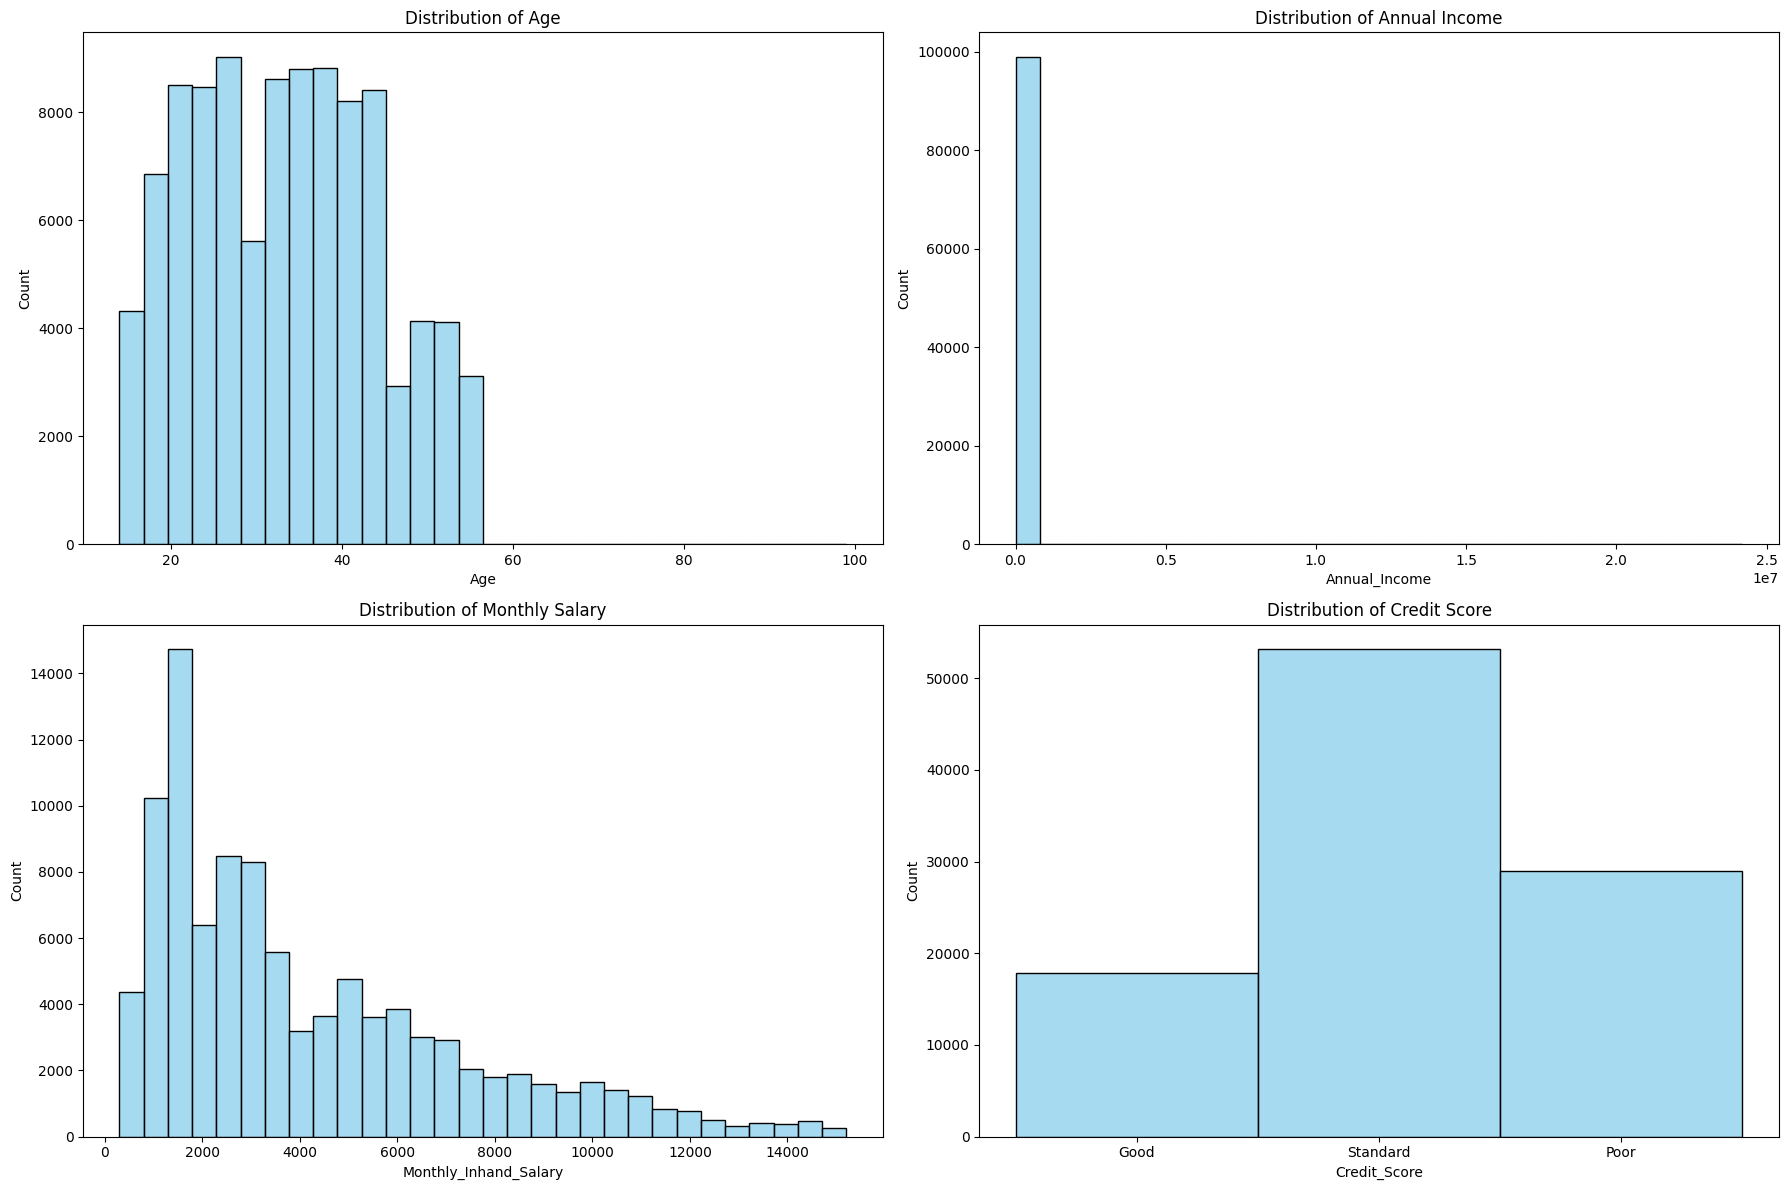

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Age

sns.histplot(ax=axes[0, 0], data=df_cleaned, x="Age", bins=30, color='skyblue')
axes[0, 0].set_title('Distribution of Age')

# Annual_Income

sns.histplot(ax=axes[0, 1], data=df_cleaned, x="Annual_Income", bins=30, color='skyblue')
axes[0, 1].set_title('Distribution of Annual Income')

# Monthly_Inhand_Salary

sns.histplot(ax=axes[1, 0], data=df_cleaned, x="Monthly_Inhand_Salary", bins=30, color='skyblue')
axes[1, 0].set_title('Distribution of Monthly Salary')

# Credit_Score

sns.histplot(ax=axes[1, 1], data=df_cleaned, x="Credit_Score", bins=30, color='skyblue')
axes[1, 1].set_title('Distribution of Credit Score')

plt.tight_layout()
plt.show()


- Age: The distribution of ages seems to be right-skewed, indicating that there are more young customers in the dataset. There is also a noticeable spike in frequency at around the age of 30.

- Annual Income: The annual income of the customers is also right-skewed, which is common in income data. This indicates that the majority of customers have lower incomes, while a smaller number have very high incomes.

- Monthly Salary: The distribution of monthly salaries closely follows that of annual incomes, which is expected as they are directly related. Again, the majority of customers have lower monthly salaries.

- Credit Score: The distribution of credit scores appears to be approximately normally distributed, with a peak around the score of 700. The scores range from around 500 to 850, which is the typical range for FICO credit scores.

### Bivariate Analysis

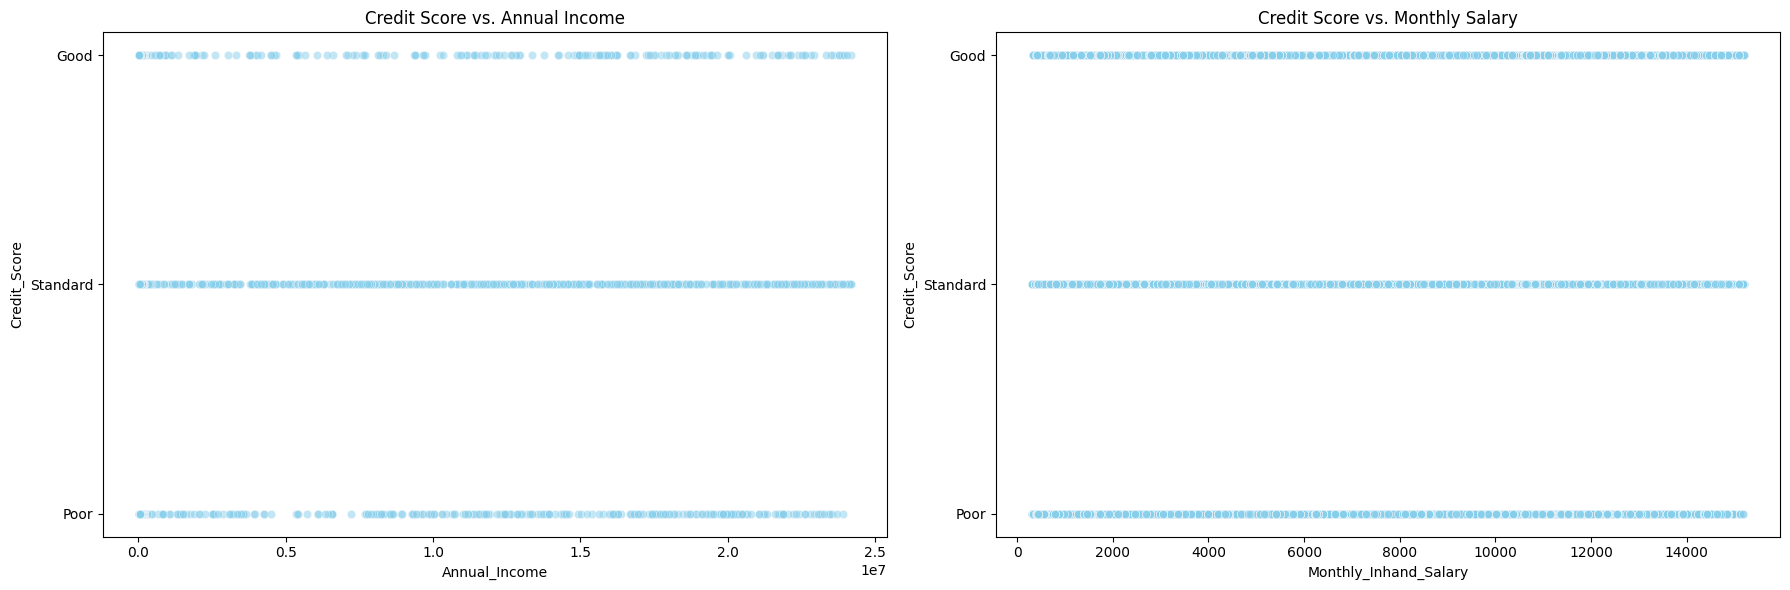

In [26]:
# Credit Score vs. Annual Income and Monthly Salary

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Credit Score vs. Annual Income

sns.scatterplot(ax=axes[0], data=df_cleaned, x="Annual_Income", y="Credit_Score", color='skyblue', alpha=0.5)
axes[0].set_title('Credit Score vs. Annual Income')

# Credit Score vs. Monthly Salary

sns.scatterplot(ax=axes[1], data=df_cleaned, x="Monthly_Inhand_Salary", y="Credit_Score", color='skyblue', alpha=0.5)
axes[1].set_title('Credit Score vs. Monthly Salary')

plt.tight_layout()
plt.show()

- Credit Score vs. Annual Income: There seems to be no strong linear relationship between annual income and credit score. People with both high and low annual incomes have a wide range of credit scores. This might indicate that while income is a factor in determining credit score, it is not the only factor.

- Credit Score vs. Monthly Salary: Similar to annual income, there is no clear linear relationship between monthly salary and credit score. We see a wide range of credit scores for both high and low monthly salaries.

Other variables, such as payment history, the length of credit history etc. might also play significant roles. Let's check for these features as well

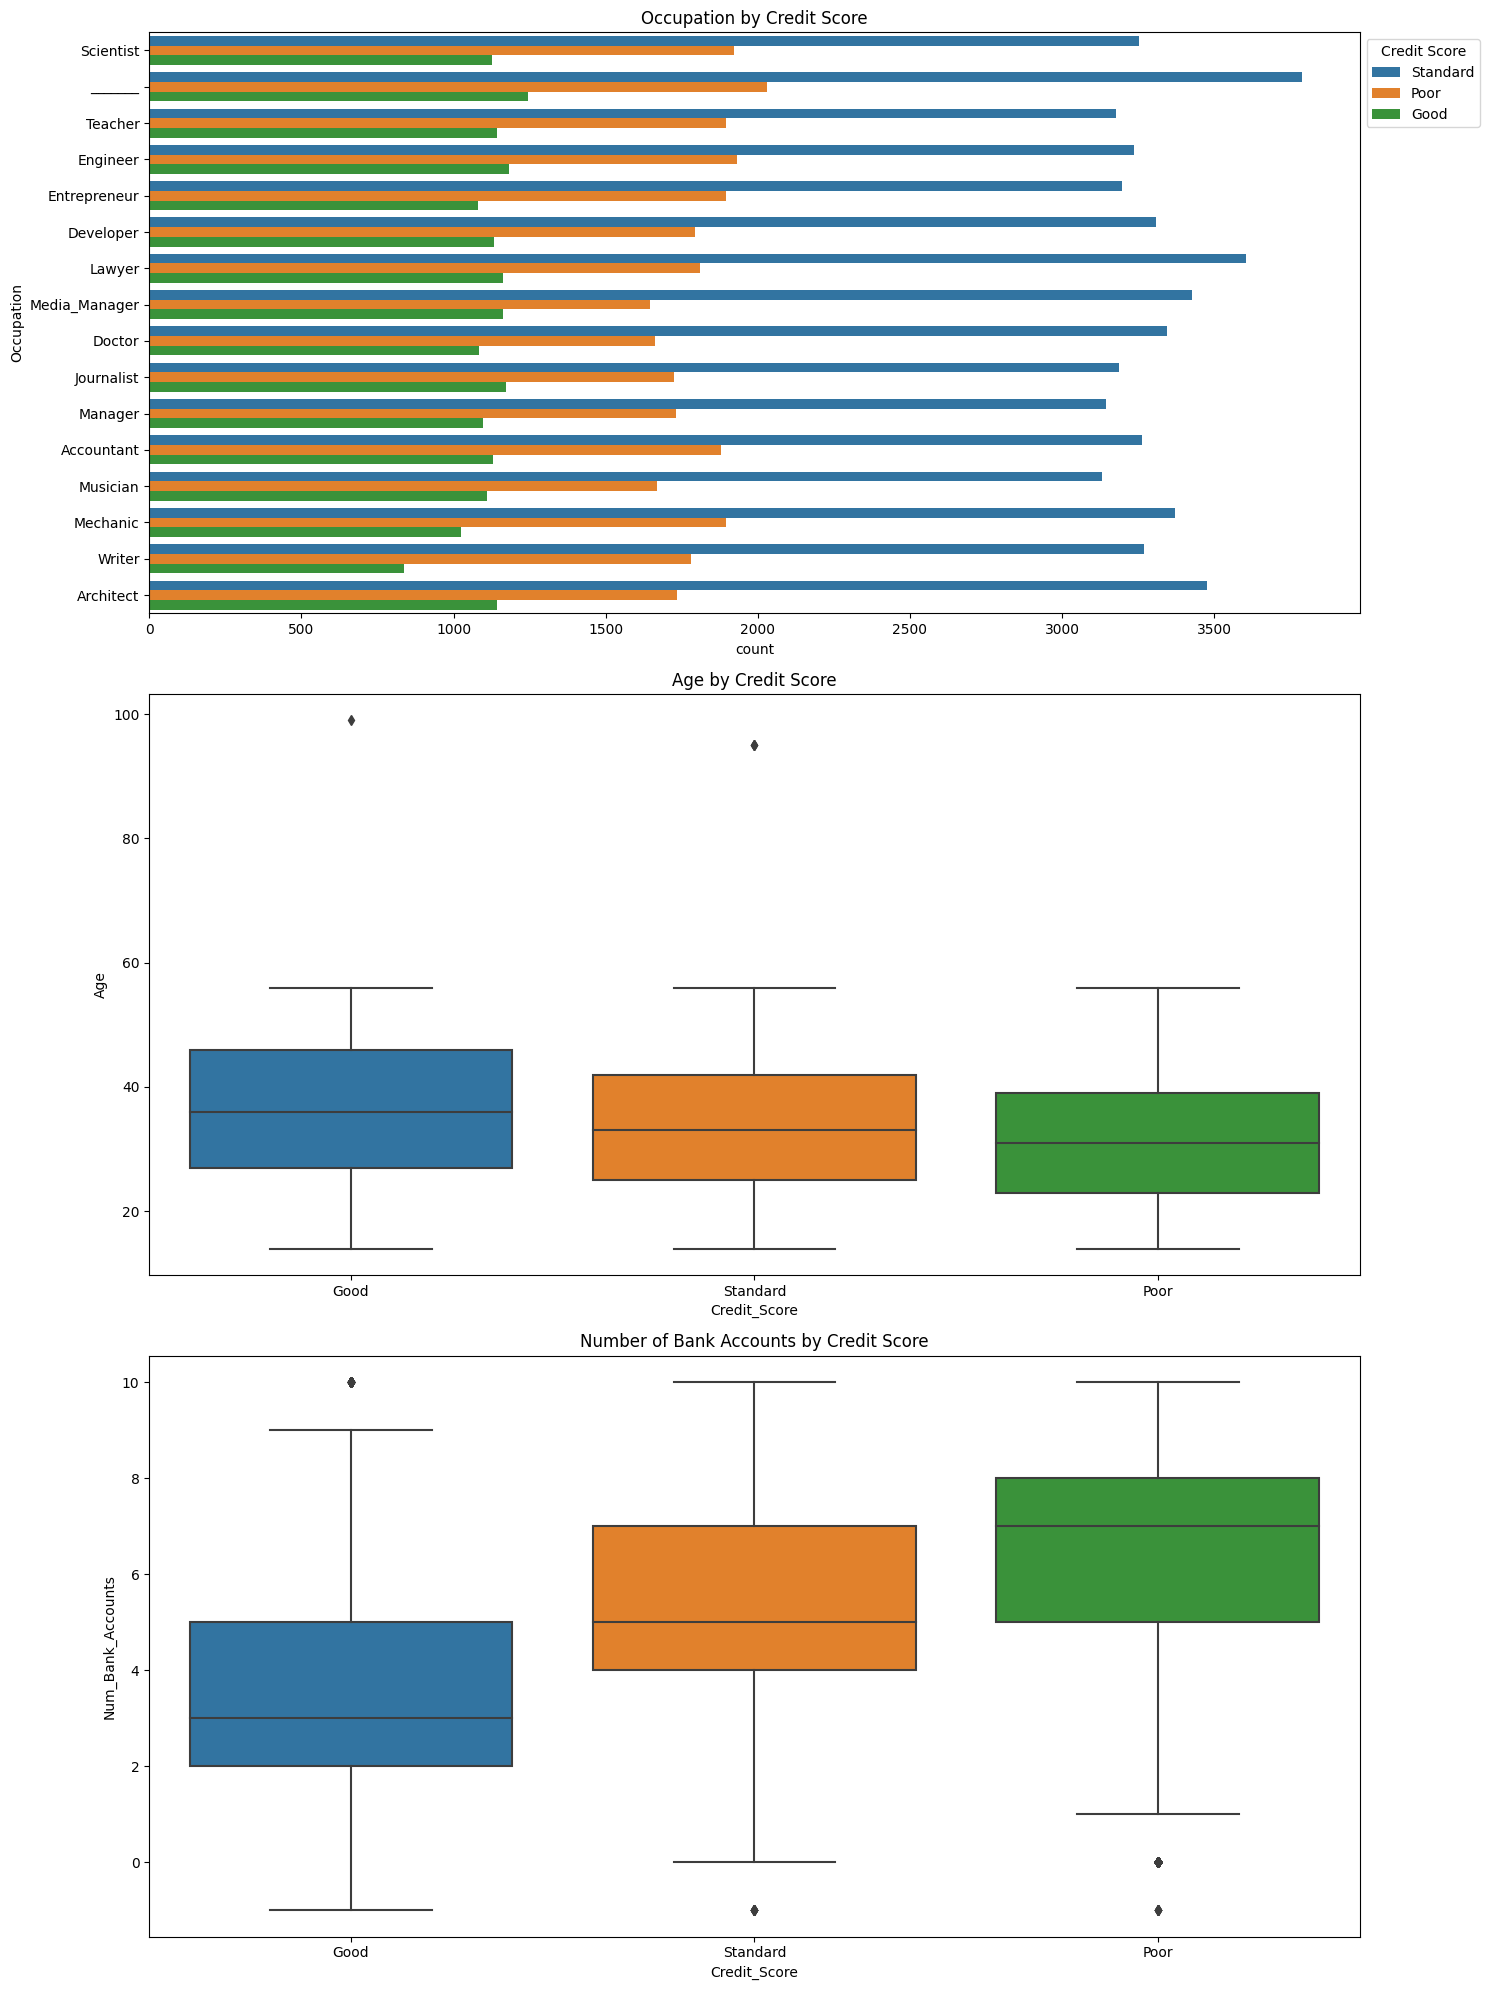

In [27]:
# Credit Score and Occupation, Age, Num_Bank_Accounts

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

# Count plot of Occupation by Credit_Score
sns.countplot(ax=axes[0], data=df_cleaned, y="Occupation", hue="Credit_Score", hue_order=df_cleaned["Credit_Score"].value_counts().index)
axes[0].set_title('Occupation by Credit Score')
axes[0].legend(title='Credit Score', bbox_to_anchor=(1, 1), loc='upper left')  # Move the legend outside the plot

# Box plot of Age by Credit_Score
sns.boxplot(ax=axes[1], data=df_cleaned, x="Credit_Score", y="Age")
axes[1].set_title('Age by Credit Score')

# Box plot of Num_Bank_Accounts by Credit_Score
sns.boxplot(ax=axes[2], data=df_cleaned, x="Credit_Score", y="Num_Bank_Accounts")
axes[2].set_title('Number of Bank Accounts by Credit Score')

plt.tight_layout()
plt.show()


- Occupation by Credit Score: We see that there is an erroneous value in the Occupation category. We will deal with this later. Among specific occupations, Manager and Executive are relatively common among customers with Good credit scores, suggesting these occupations might be associated with better financial behaviors and hence higher credit scores.

- Age by Credit Score: We can see that the median age tends to increase as the credit score improves. This might be because older individuals have had more time to build their credit history and improve their credit scores. 

- Number of Bank Accounts by Credit Score: Similar to age, the number of bank accounts tends to increase with the credit score. This might be because individuals with higher credit scores are more likely to have access to multiple bank accounts.

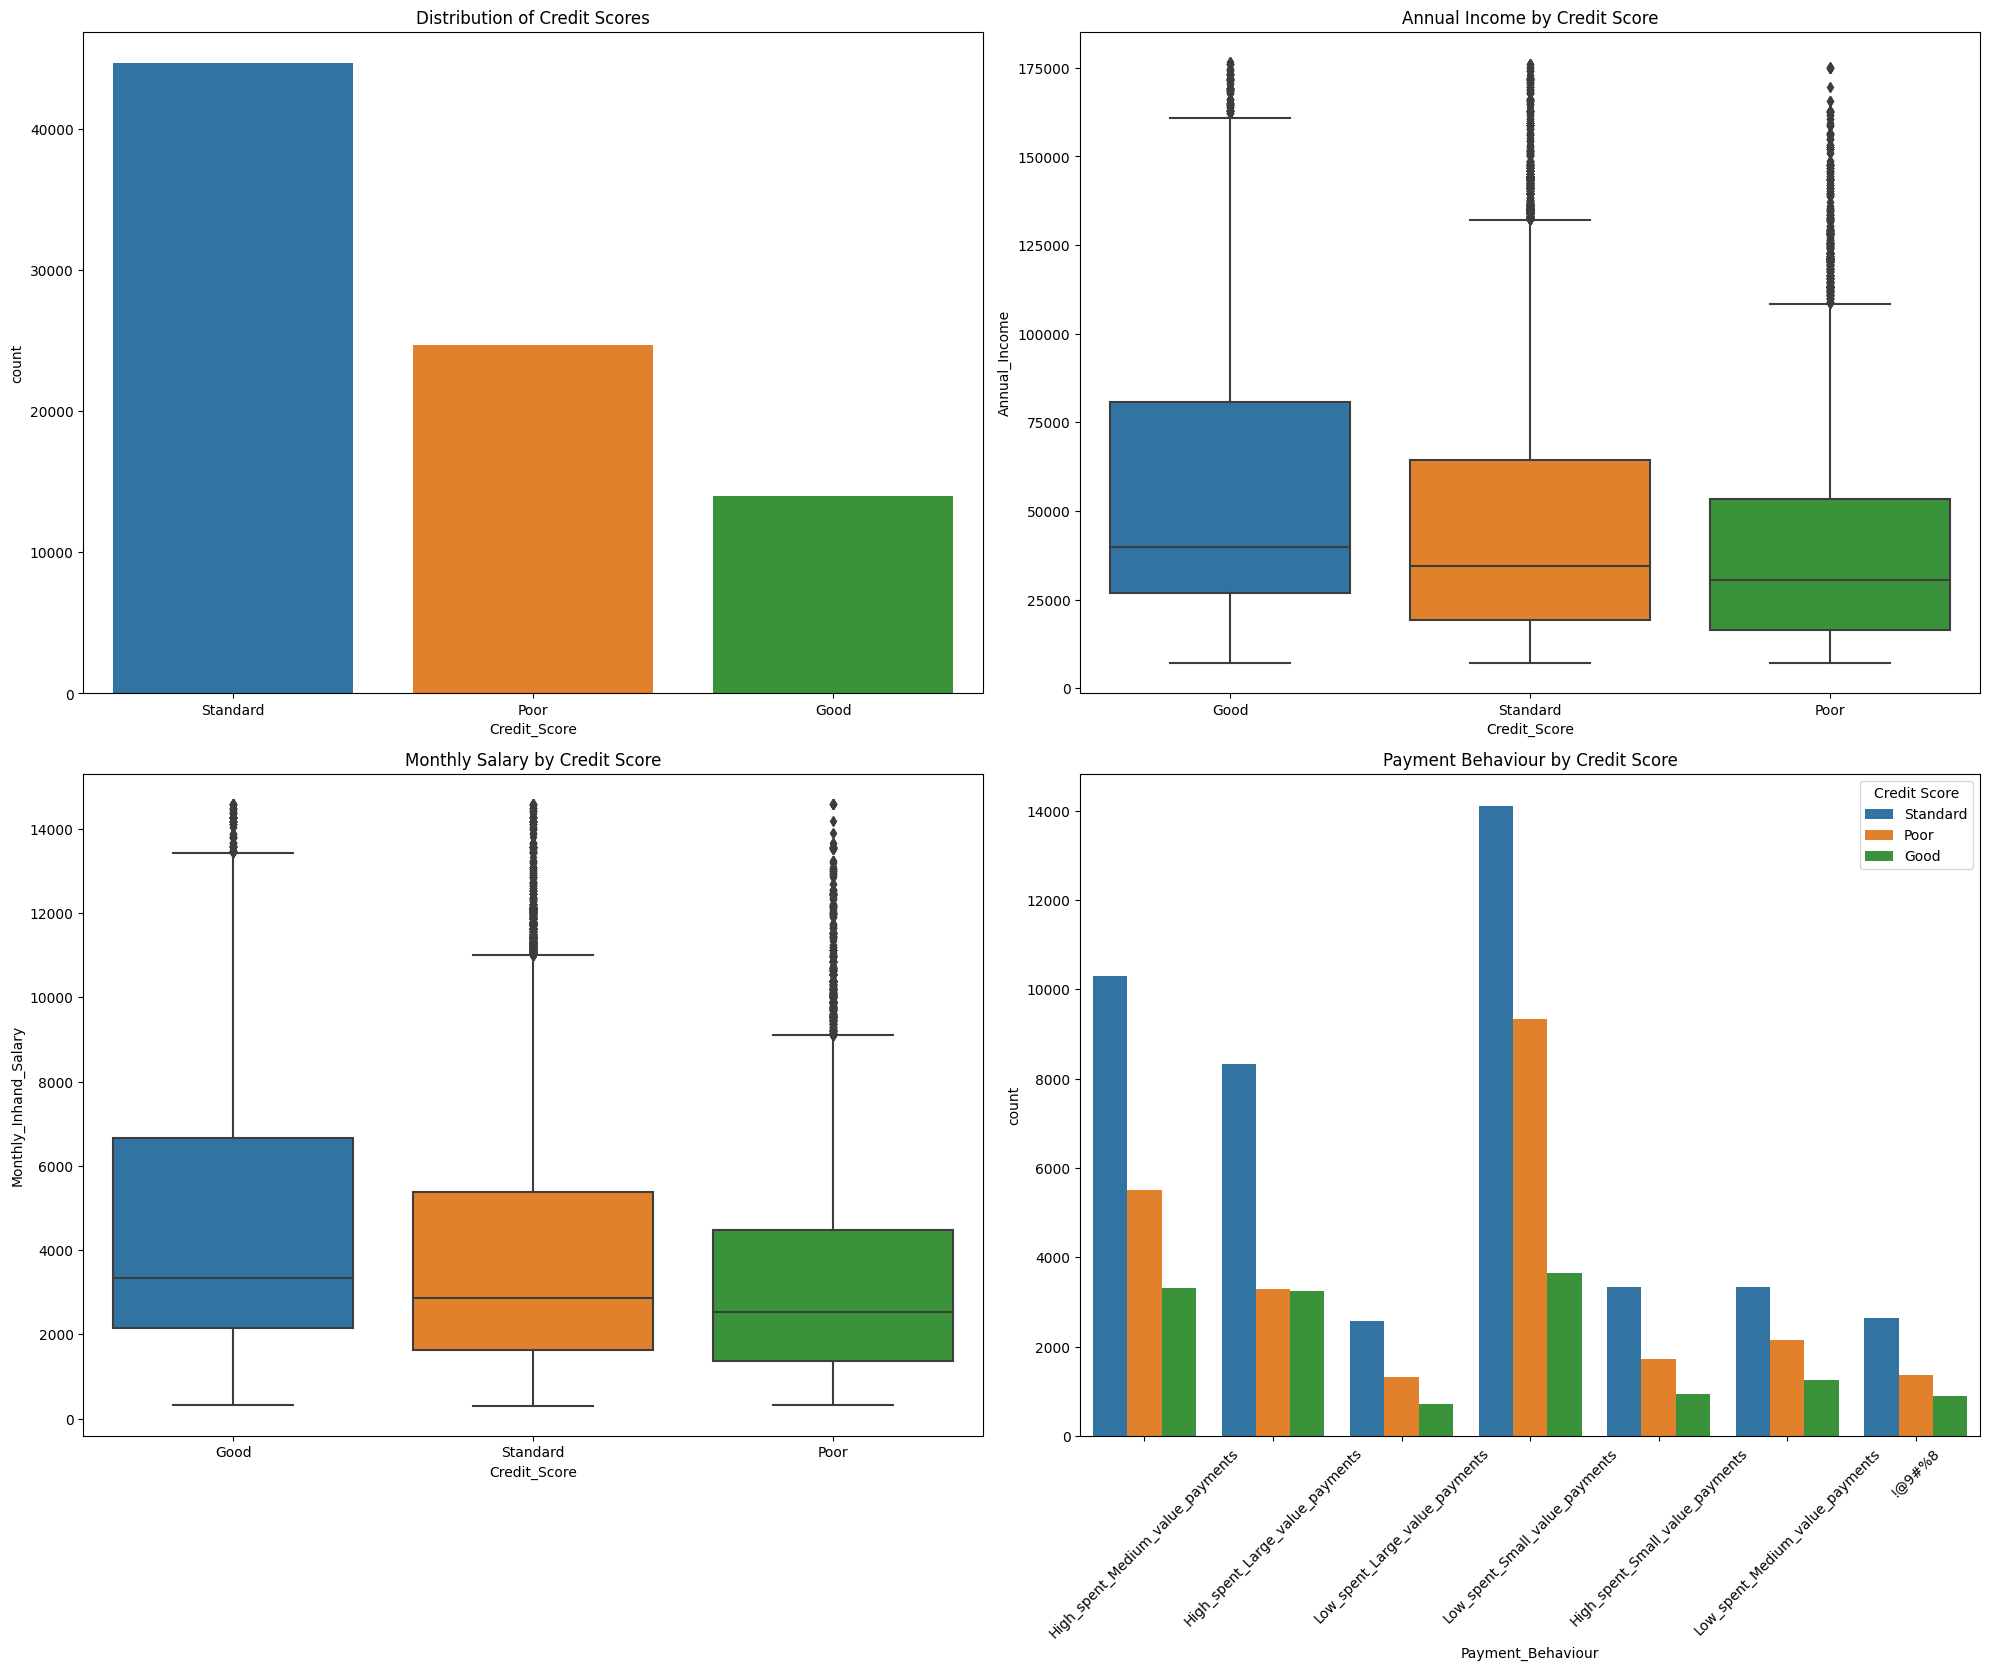

In [123]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Count plot for Credit_Score

sns.countplot(ax=axes[0, 0], data=df_cleaned, x="Credit_Score", order=df_cleaned["Credit_Score"].value_counts().index)
axes[0, 0].set_title('Distribution of Credit Scores')

# Box plot of Annual_Income by Credit_Score

sns.boxplot(ax=axes[0, 1], data=df_cleaned, x="Credit_Score", y="Annual_Income")
axes[0, 1].set_title('Annual Income by Credit Score')

# Box plot of Monthly_Inhand_Salary by Credit_Score

sns.boxplot(ax=axes[1, 0], data=df_cleaned, x="Credit_Score", y="Monthly_Inhand_Salary")
axes[1, 0].set_title('Monthly Salary by Credit Score')

# Count plot of Payment_Behaviour by Credit_Score

sns.countplot(ax=axes[1, 1], data=df_cleaned, x="Payment_Behaviour", hue="Credit_Score", hue_order=df_cleaned["Credit_Score"].value_counts().index)
axes[1, 1].set_title('Payment Behaviour by Credit Score')
axes[1, 1].legend(title='Credit Score')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


- Distribution of Credit Scores: This count plot shows the frequency of each credit score in our dataset. Most people have a Standard credit score, while only a minority have Good credit scores.

- Annual Income by Credit Score: We can see that the median income tends to increase with the credit score, suggesting a positive relationship between income and credit score.

- Monthly Salary by Credit Score: Similar to annual income, the median monthly salary also seems to increase with the credit score. This again suggests that individuals with higher incomes tend to have higher credit scores.

- Payment Behaviour by Credit Score: We can see that certain payment behaviours are more common for certain credit scores. For example, Most people with across all the credit scores spend less and make low value payments. We also see an erroneous value, we will clean this later.

These insights suggest that both income and payment behaviour are important factors that influence an individual's credit score. Individuals with higher incomes and better payment behaviours tend to have higher credit scores.

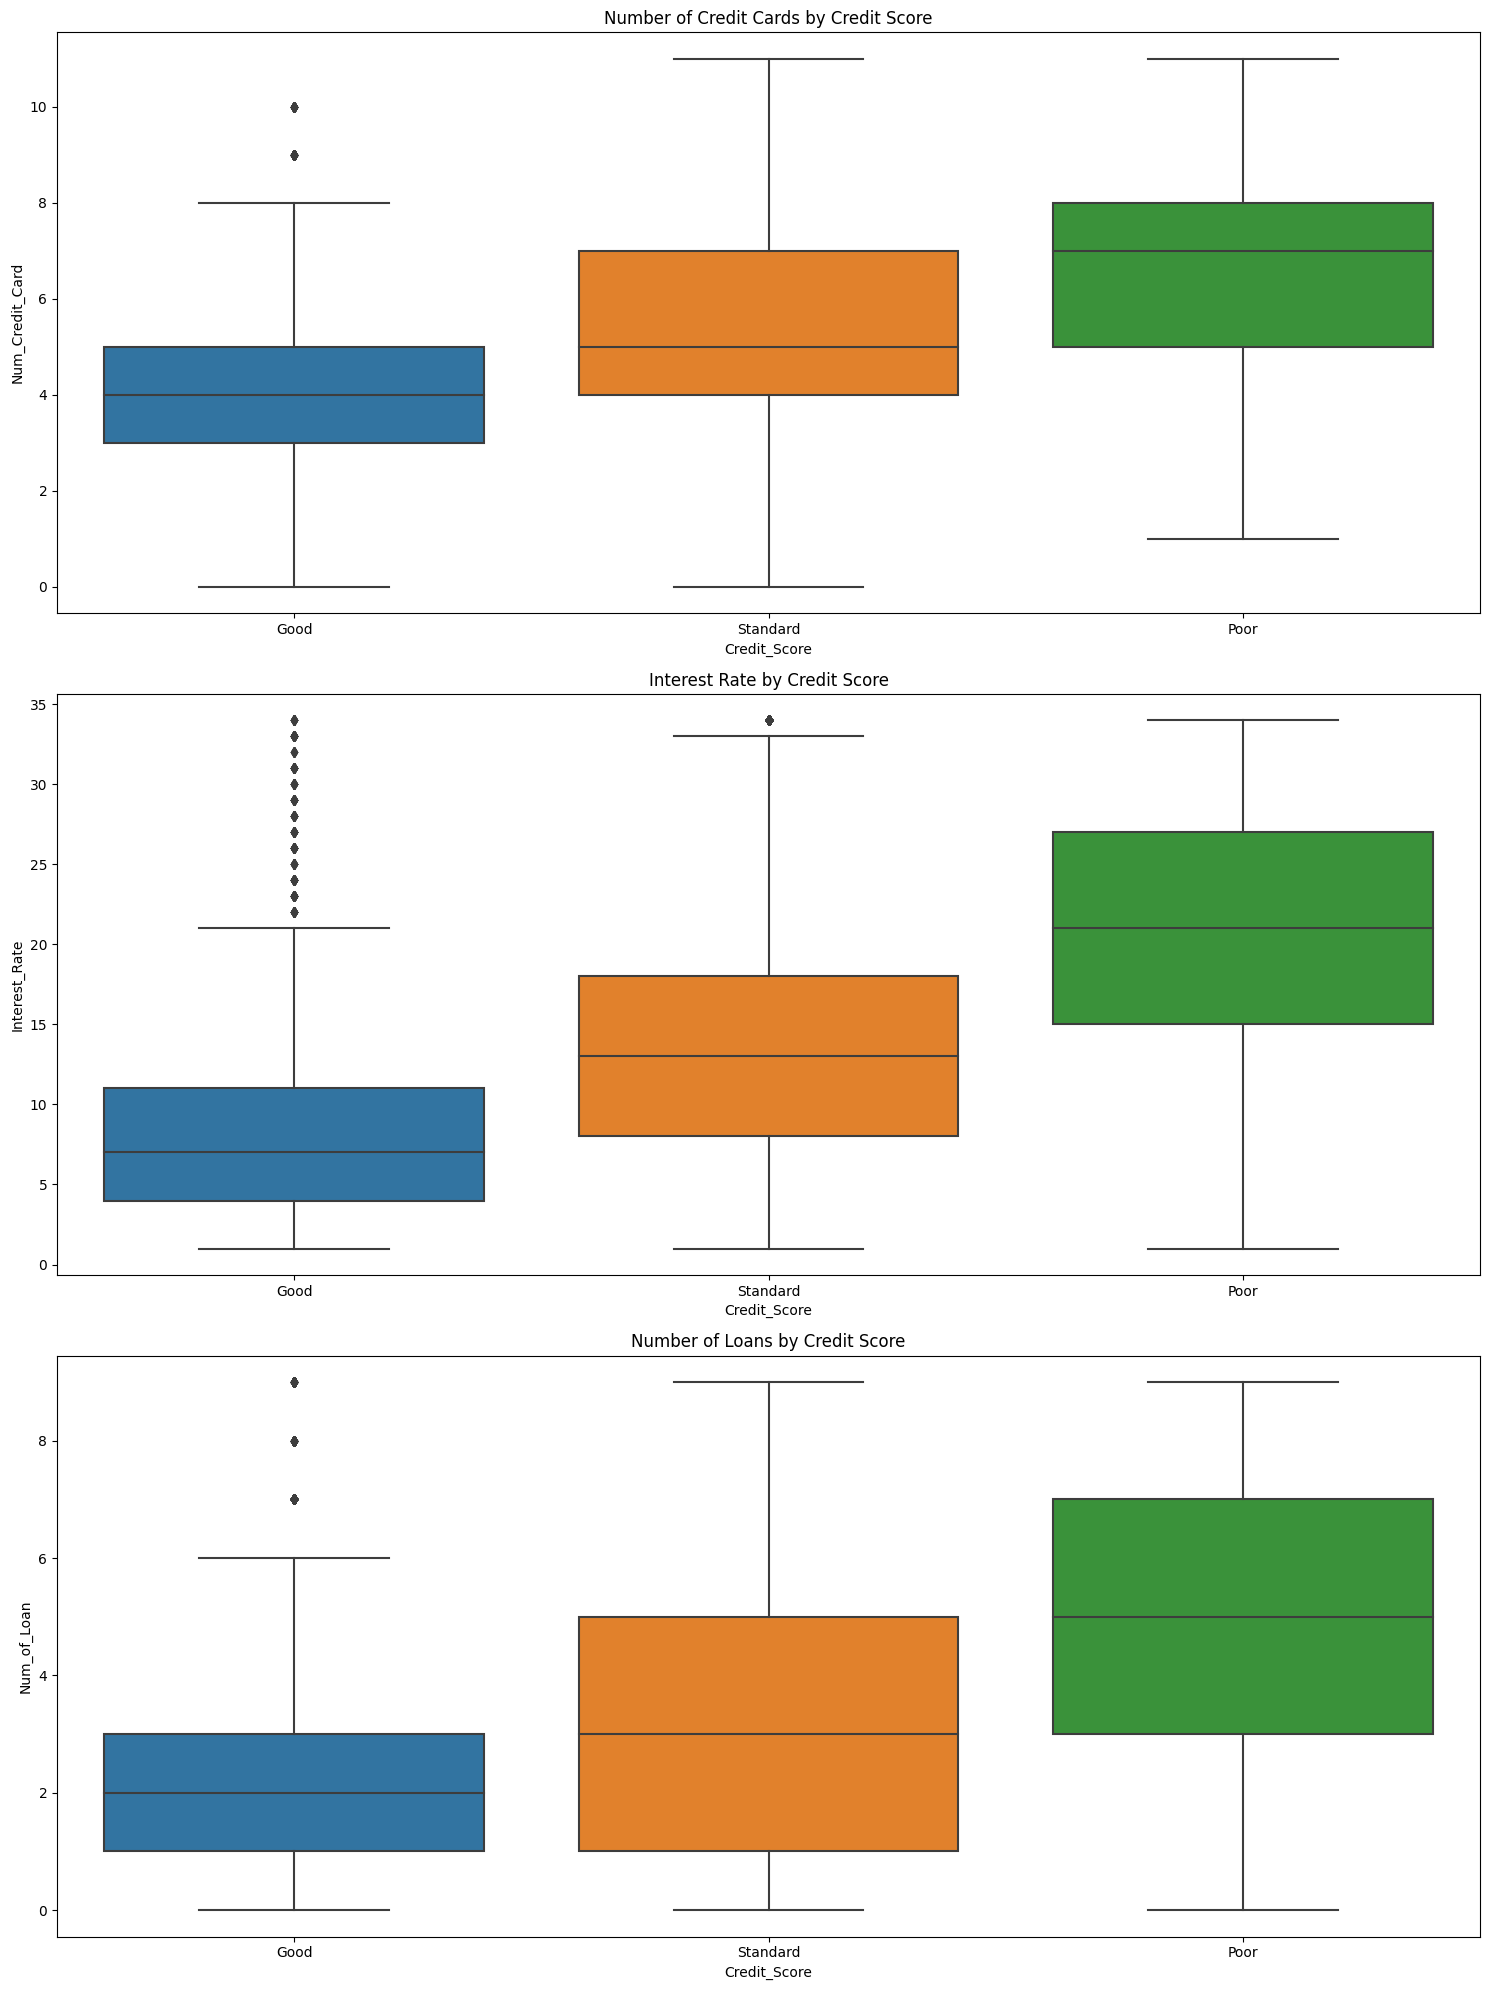

In [29]:
# Credit Score and Num_Credit_Card, Interest_Rate, Num_of_Loan

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

# Box plot of Num_Credit_Card by Credit_Score

sns.boxplot(ax=axes[0], data=df_cleaned, x="Credit_Score", y="Num_Credit_Card")
axes[0].set_title('Number of Credit Cards by Credit Score')

# Box plot of Interest_Rate by Credit_Score

sns.boxplot(ax=axes[1], data=df_cleaned, x="Credit_Score", y="Interest_Rate")
axes[1].set_title('Interest Rate by Credit Score')

# Box plot of Num_of_Loan by Credit_Score

sns.boxplot(ax=axes[2], data=df_cleaned, x="Credit_Score", y="Num_of_Loan")
axes[2].set_title('Number of Loans by Credit Score')

plt.tight_layout()
plt.show()


- Number of Credit Cards : We can see that the median number of credit cards tends to increase as the credit score improves. This might be because individuals with higher credit scores are more likely to be approved for credit cards.

- Interest Rate : The median interest rate tends to decrease as the credit score improves, suggesting that individuals with higher credit scores generally receive lower interest rates on their loans. This is consistent with the idea that individuals with higher credit scores are considered less risky by lenders and therefore qualify for lower interest rates.

- Number of Loans : The median number of loans tends to decrease as the credit score improves. This might be because individuals with lower credit scores are more likely to take out loans, possibly due to financial hardship.

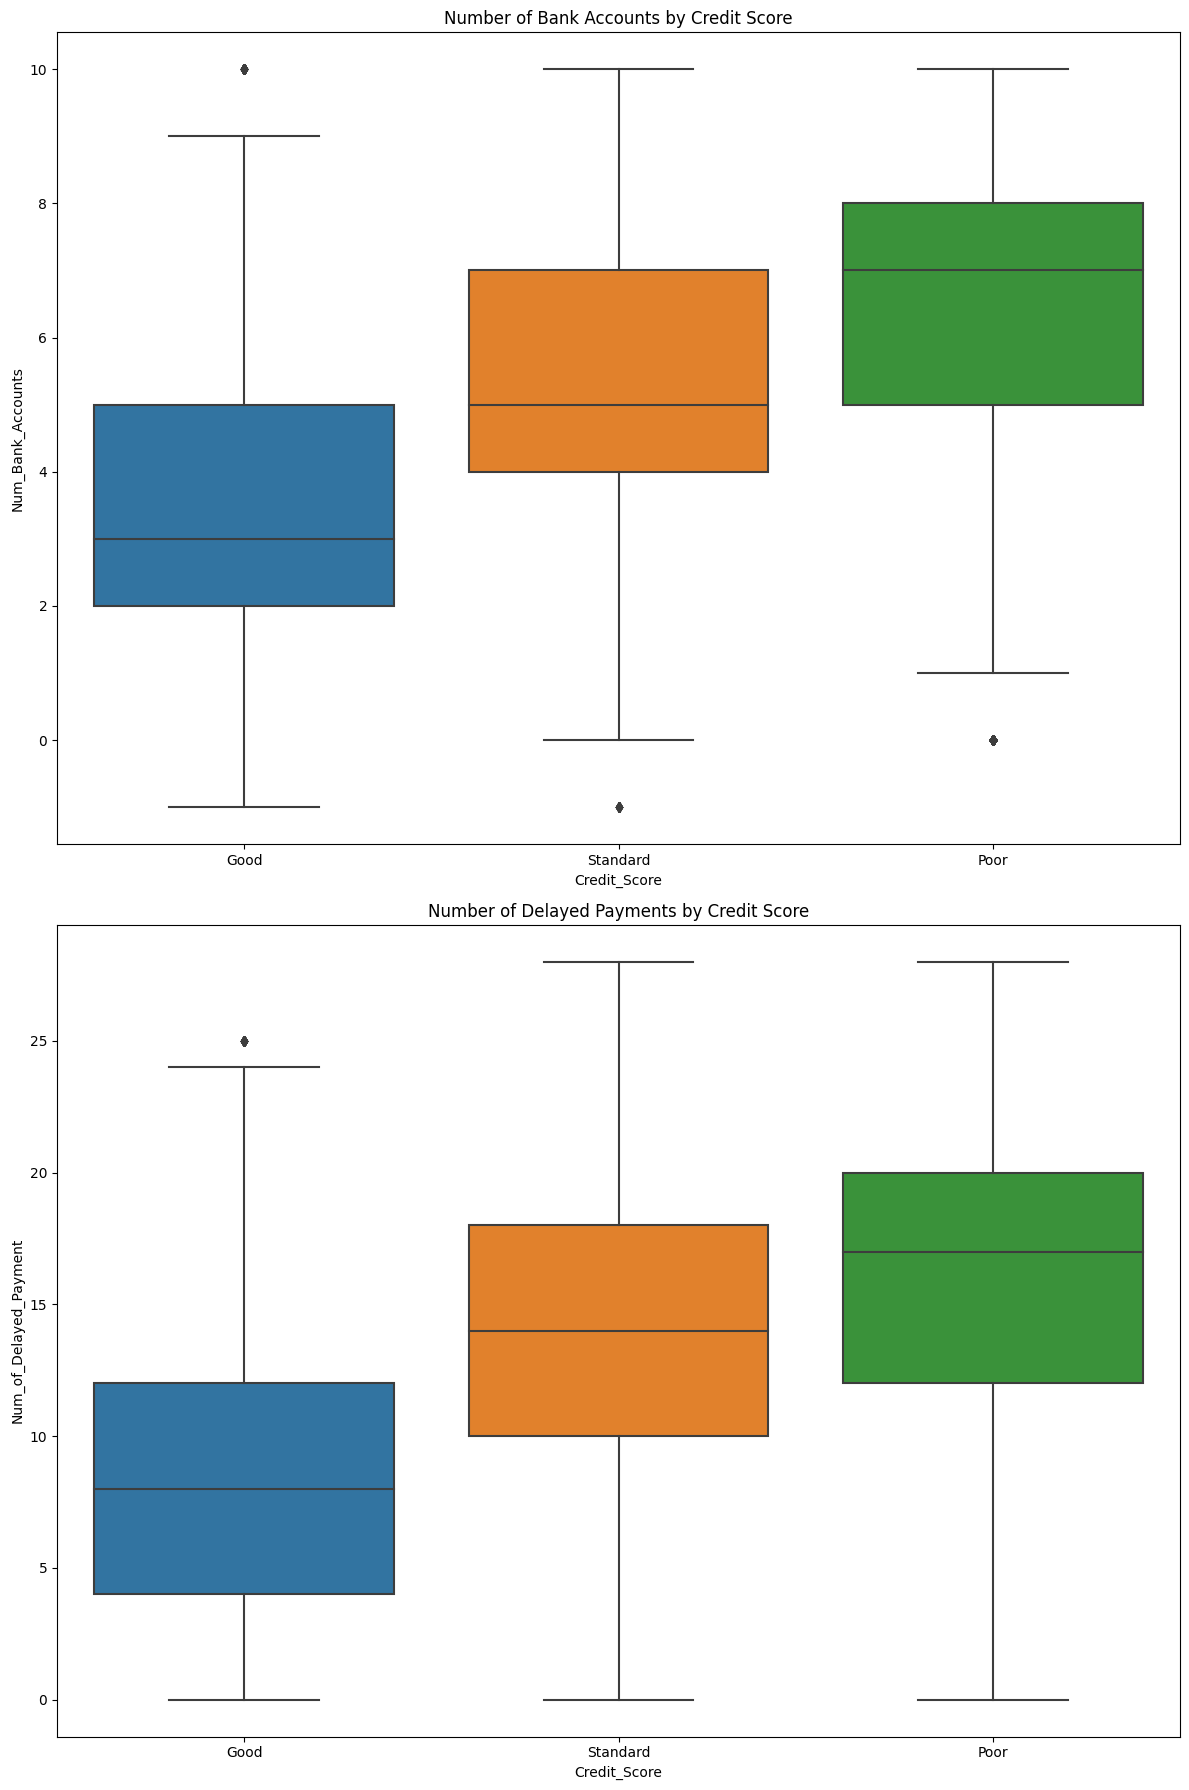

In [125]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 18))

# Box plot of Num_Bank_Accounts by Credit_Score

sns.boxplot(ax=axes[0], data=df_cleaned, x="Credit_Score", y="Num_Bank_Accounts")
axes[0].set_title('Number of Bank Accounts by Credit Score')

# Box plot of Num_of_Delayed_Payment by Credit_Score

sns.boxplot(ax=axes[1], data=df_cleaned, x="Credit_Score", y="Num_of_Delayed_Payment")
axes[1].set_title('Number of Delayed Payments by Credit Score')

plt.tight_layout()
plt.show()


- Number of Bank Accounts by Credit Score: There is not a significant difference in the number of bank accounts across different credit scores, suggesting that the number of bank accounts may not be a strong predictor of credit score.

- Number of Delayed Payments by Credit Score: We can see that the number of delayed payments tends to increase as credit scores decrease, suggesting a negative relationship between the number of delayed payments and credit score. This is consistent with the idea that individuals who often delay payments are more likely to have lower credit scores.

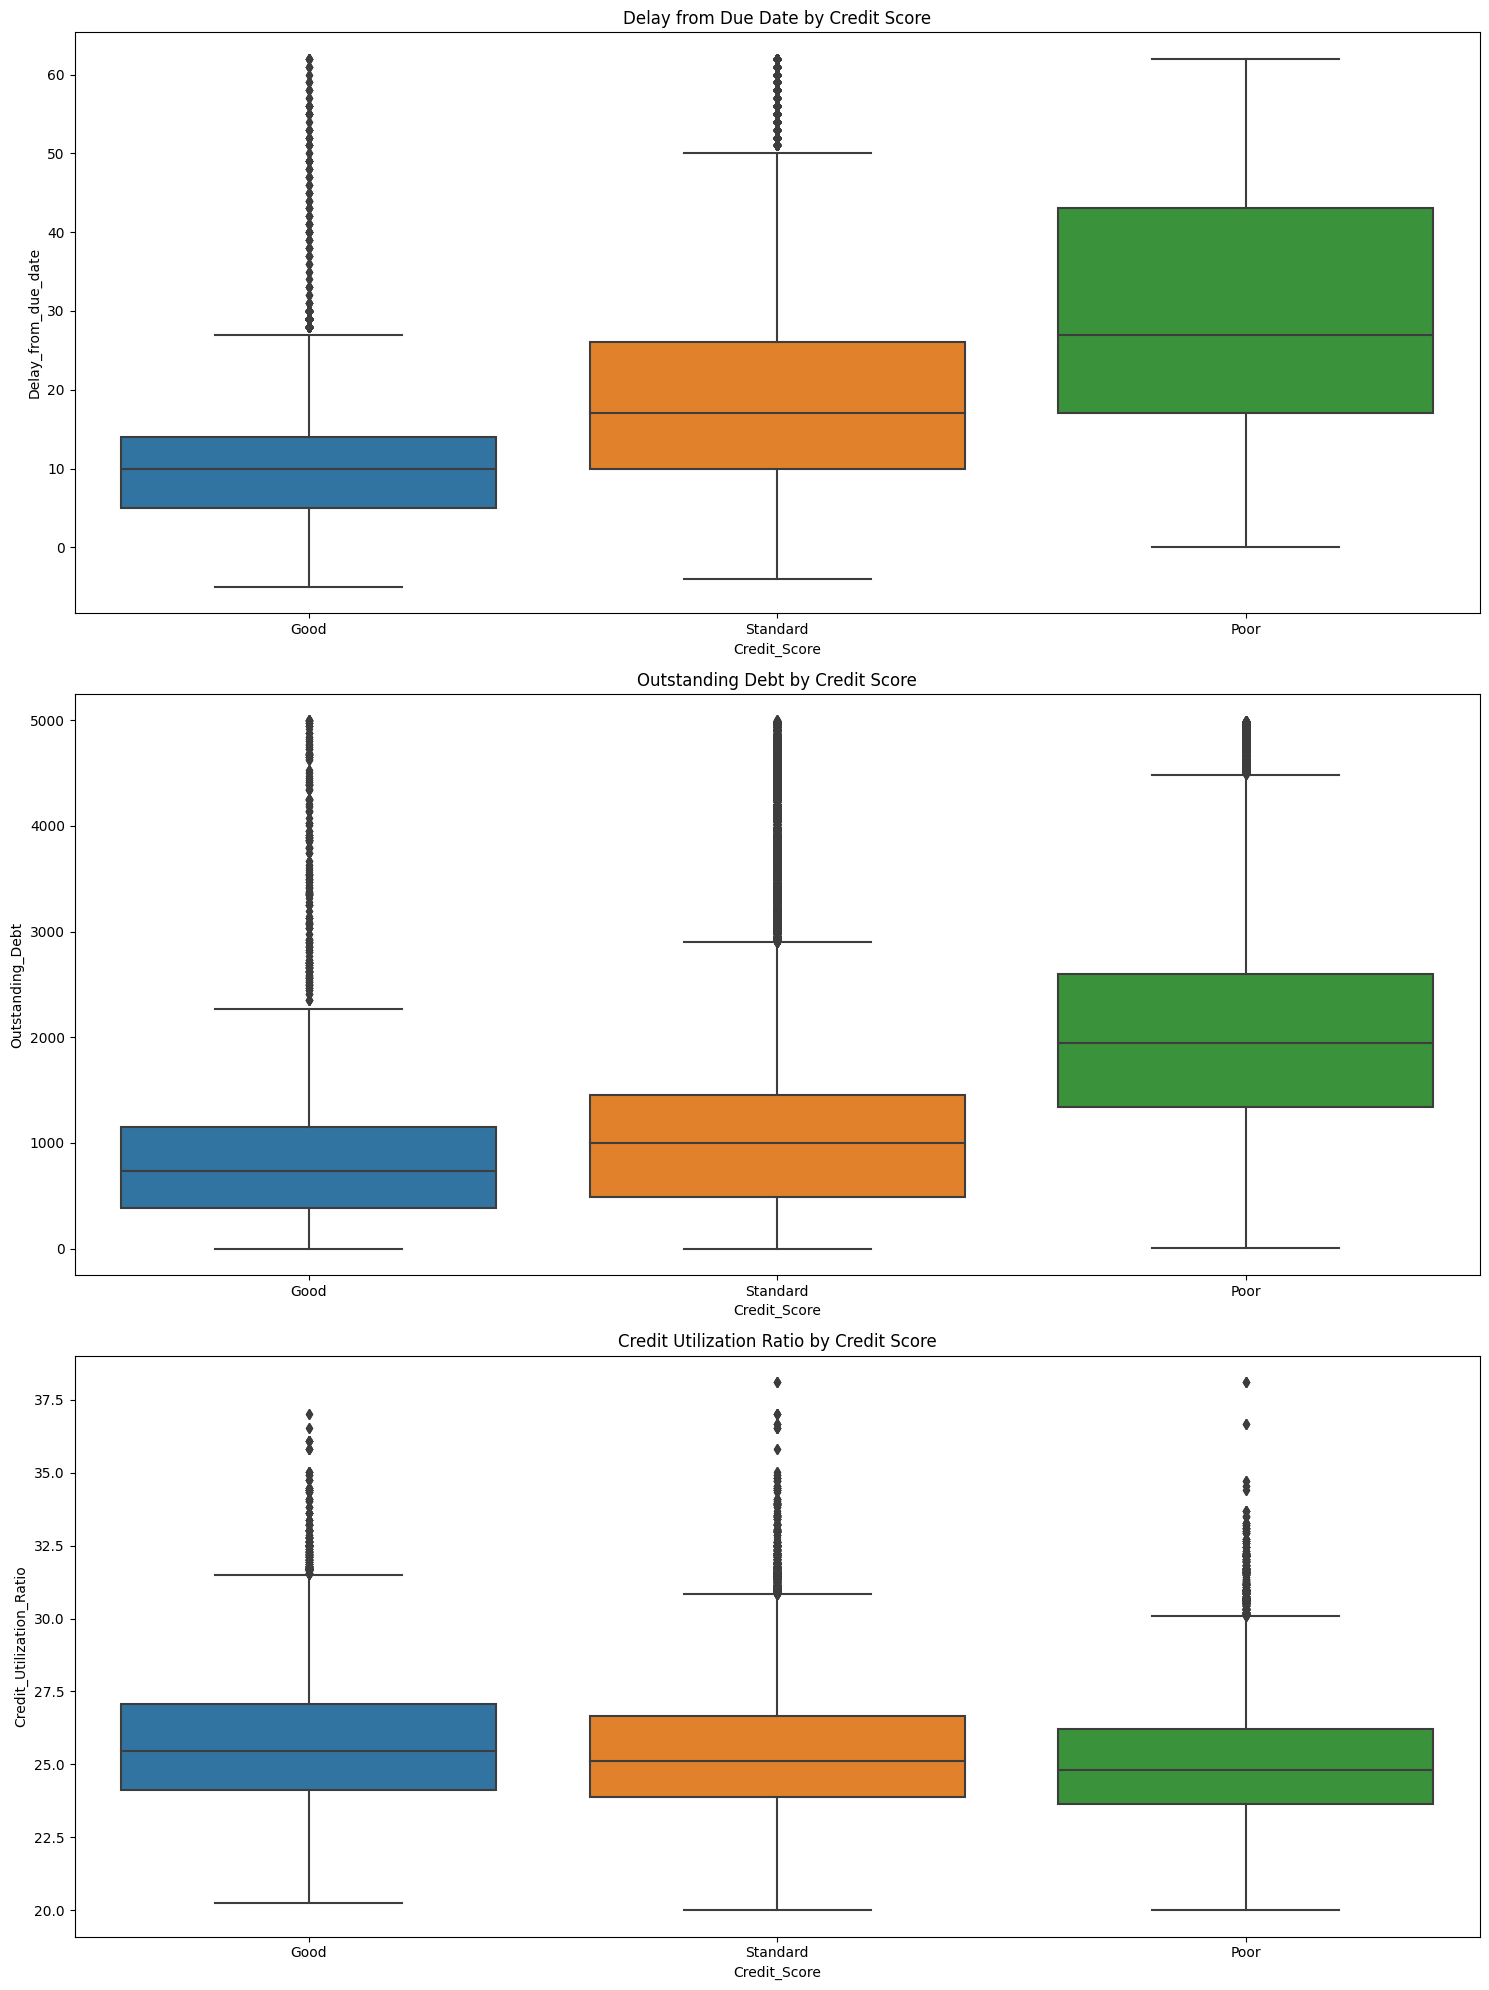

In [31]:
# Credit Score and Delay_from_due_date, Outstanding_Debt, Credit_Utilization_Ratio

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

# Box plot of Delay_from_due_date by Credit_Score

sns.boxplot(ax=axes[0], data=df_cleaned, x="Credit_Score", y="Delay_from_due_date")
axes[0].set_title('Delay from Due Date by Credit Score')

# Box plot of Outstanding_Debt by Credit_Score

sns.boxplot(ax=axes[1], data=df_cleaned, x="Credit_Score", y="Outstanding_Debt")
axes[1].set_title('Outstanding Debt by Credit Score')

# Box plot of Credit_Utilization_Ratio by Credit_Score

sns.boxplot(ax=axes[2], data=df_cleaned, x="Credit_Score", y="Credit_Utilization_Ratio")
axes[2].set_title('Credit Utilization Ratio by Credit Score')

plt.tight_layout()
plt.show()


- Delay from Due Date : We can see that the median delay from due date tends to increase as the credit score decreases. This might be because individuals with lower credit scores are more likely to miss their payment deadlines. 

- Outstanding Debt : This box plot shows the distribution of outstanding debt for each credit score category. There does not appear to be a clear relationship between outstanding debt and credit score.

- Credit Utilization Ratio : The median credit utilization ratio tends to increase as the credit score decreases, suggesting a negative relationship between credit utilization ratio and credit score. This is consistent with the idea that individuals who frequently use a high proportion of their available credit are more likely to have lower credit scores.

In [133]:
# Credit Score and different type of Loans

loan_cols = [col for col in df_cleaned.columns if 'Loan' in col and 'Type' and 'Num' not in col]

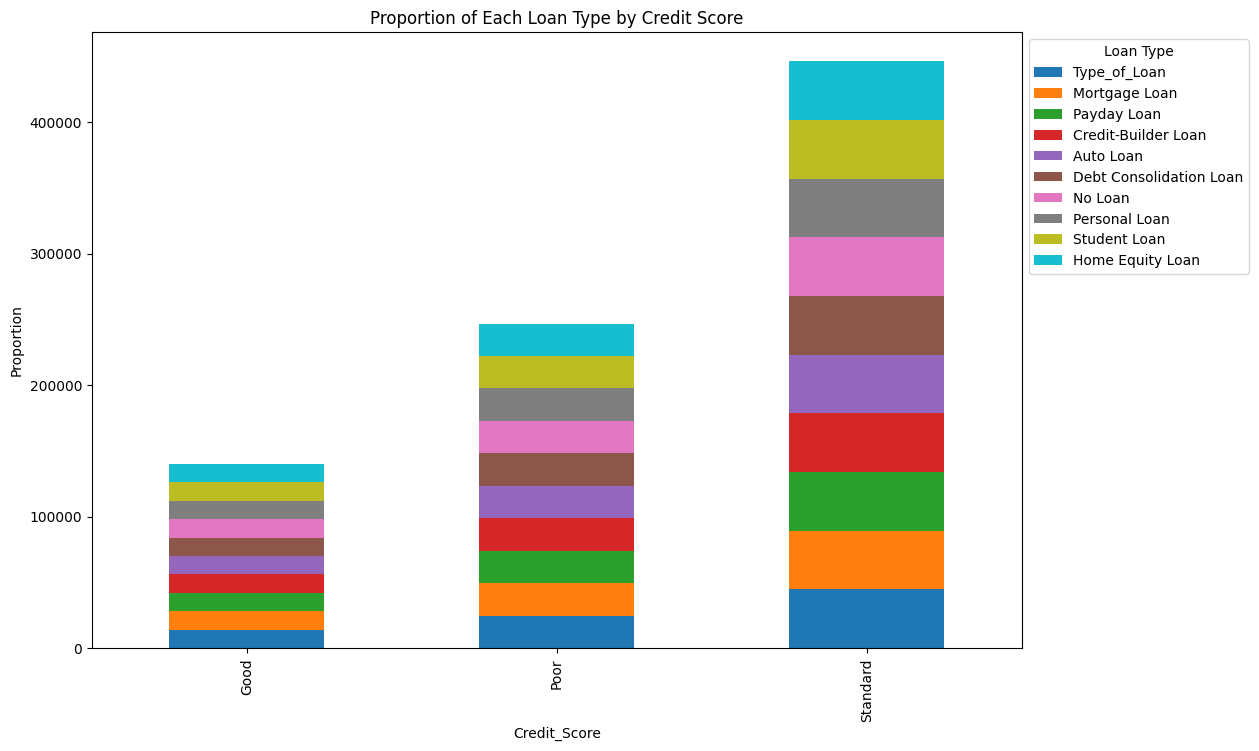

In [136]:
# Group by Credit_Score and loan type columns, calculate the mean

loan_proportions = df_cleaned.groupby('Credit_Score')[loan_cols].count()

loan_proportions.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Proportion of Each Loan Type by Credit Score')
plt.ylabel('Proportion')
plt.legend(title='Loan Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

- No Loan category is significantly larger for customers with credit scores of Standard and Poor, indicating that these customers are less likely to have any type of loan. This could be because they are less likely to be approved for loans due to their low credit scores.

- Auto and Personal Loan are common among all categories of customers, irrespective of their credit scores.

- Customers with Good and Standard credit scores have a higher proportion of Mortgage and Home Equity Loan, suggesting that these customers are more likely to be homeowners.

- Debt Consolidation Loan seems to be common among customers with Standard and Poor credit scores. These customers might have consolidated their debts in an attempt to improve their financial situation and credit scores.

- Payday Loan, which is often associated with high interest rates and fees, is more common among customers with Standard and Poor credit scores. This might be due to these customers having fewer borrowing options due to their low credit scores.

- Student and Credit-Builder Loan are relatively less common across all credit score categories.

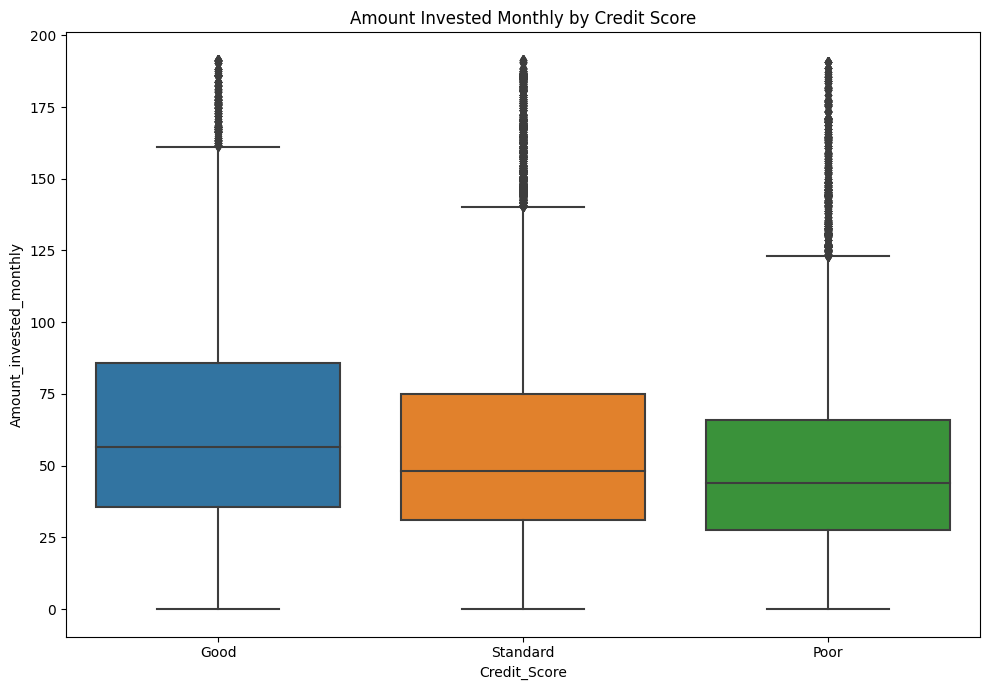

In [137]:
# Credit Score and Amount_invested_monthly

fig, ax = plt.subplots(figsize=(10, 7))

# Box plot of Amount_invested_monthly by Credit_Score

sns.boxplot(ax=ax, data=df_cleaned, x="Credit_Score", y="Amount_invested_monthly")
ax.set_title('Amount Invested Monthly by Credit Score')

plt.tight_layout()
plt.show()

- Amount Invested Monthly by Credit The median amount invested monthly tends to increase as the credit score improves, suggesting a positive relationship between the amount invested monthly and credit score. This might be because individuals with higher credit scores are more likely to have greater financial stability, enabling them to invest more. However, the distributions also overlap significantly, suggesting that the amount invested monthly alone may not be a strong predictor of credit score.

### Outlier removal

Even though we've done extensive cleaning, there still might be erroneous values that exist in our numerical columns. 

In [162]:
# List of numerical columns

num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
            'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
            'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
            'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_Age_in_Months',
            'Total_EMI_per_month', 'Amount_invested_monthly',
            'Monthly_Balance']

In [163]:
# Identify and remove outliers using IQR method

for col in num_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define limits

    lower_limit = Q1 - 2.0 * IQR
    upper_limit = Q3 + 2.0 * IQR

    # Identify outliers

    outliers = df_cleaned[(df_cleaned[col] < lower_limit) | (df_cleaned[col] > upper_limit)]

    # Remove outliers

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_limit) & (df_cleaned[col] <= upper_limit)]

And to see if there are any additional insights that we can get before we build a model, let's build a correlation heatmap.

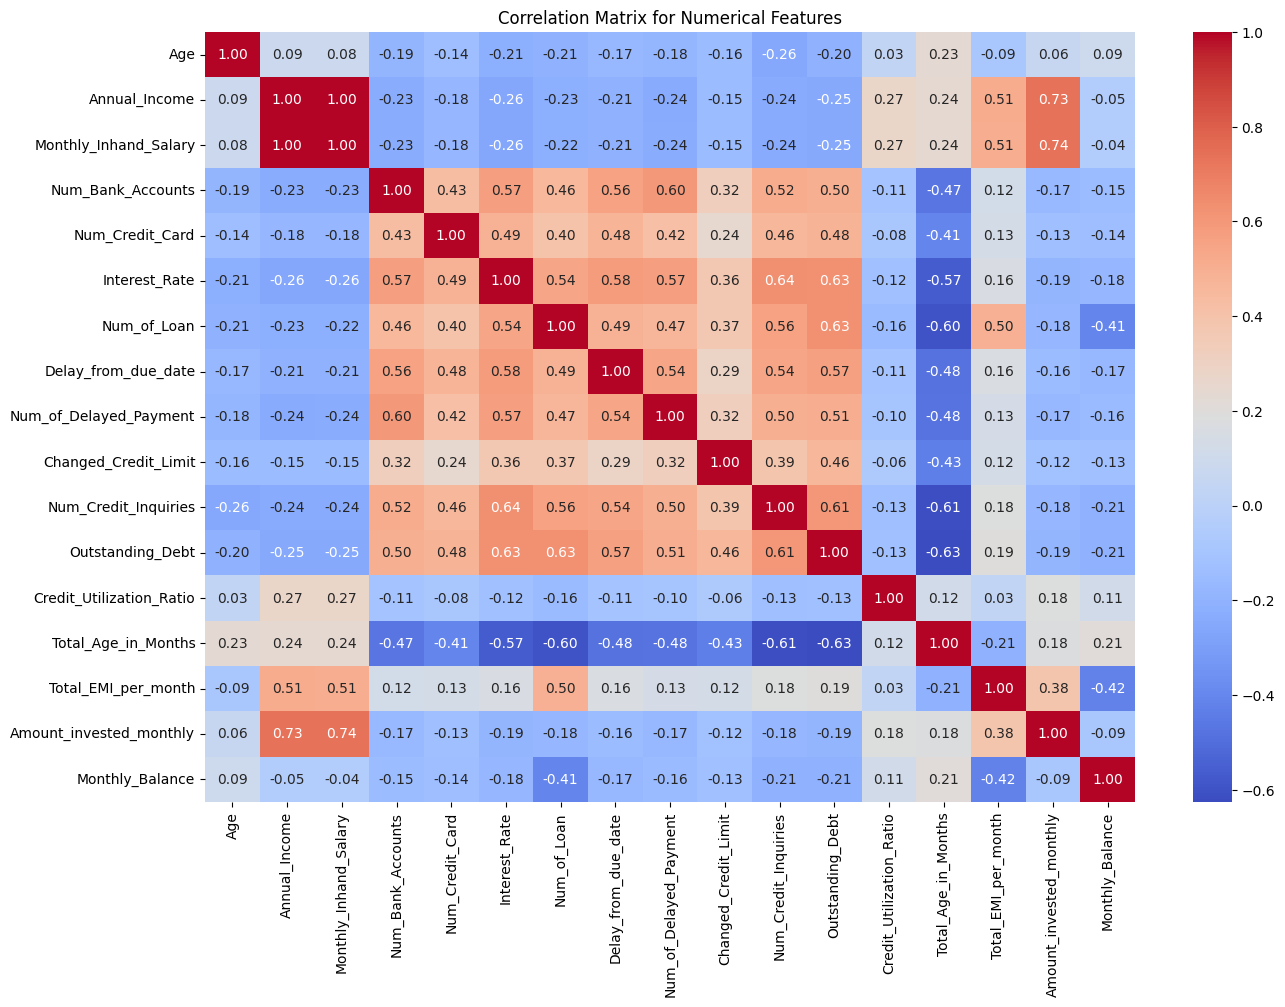

In [164]:
correlation_matrix = df_cleaned[num_cols].corr()

# Plot the correlation heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

Fortunately, our EDA was comprehensive enough that it does not look like we've missed out on anything when we made inferences

In [211]:
df_fe = df_cleaned.copy()

A couple of columns still had erroneous values when they were processed, so we'll go back to this before we build our model.

In [184]:
df_fe['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [4]:
# Function to identify and replace values with the mode if in the unique values there is an "_"

def replace_underscore_with_mode(group, column):
    if "_" in group[column].unique():
        mode_value = group[column].value_counts().index[0] if group[column].mode().iloc[0] != "_" else group[column].value_counts().index[1]
        group[column] = group[column].replace("_", mode_value)
    return group.reset_index(drop=True)

In [20]:
# Apply the function to the Credit_Mix column for each customer

df_fe = df_fe.groupby('Customer_ID', group_keys=False).apply(lambda group: replace_underscore_with_mode(group, 'Credit_Mix'))

In [6]:
# Function to replace "NM" value with the mode for the Payment_of_Min_Amount column for each customer

def replace_nm_with_mode(group, column):
    if "NM" in group[column].unique():
        mode_value = group[column].value_counts().index[0] if group[column].mode().iloc[0] != "NM" else group[column].value_counts().index[1]
        group[column] = group[column].replace("NM", mode_value)
    return group.reset_index(drop=True)

In [21]:
# Applying the function to the Payment_of_Min_Amount column for each customer

df_fe = df_fe.groupby('Customer_ID', group_keys=False).apply(lambda group: replace_nm_with_mode(group, 'Payment_of_Min_Amount'))

In [26]:
df = df_fe.copy()

### Modelling

In [54]:
# Splitting the data into train and test sets

X = df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'Credit_Score', 'Type_of_Loan'], axis=1)
y = df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4321)

In [55]:
# Numerical and categorical columns

num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', \
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', \
        'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Total_Age_in_Months']

cat_cols = ['Occupation', 'Payment_Behaviour', 'Credit_Mix']

In [56]:
# Standardizing numerical features

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

In [57]:
# One-hot encoding categorical features

X_train_cat = pd.get_dummies(X_train[cat_cols], drop_first=True)
X_test_cat = pd.get_dummies(X_test[cat_cols], drop_first=True)


In [58]:
# Aligning train and test data to have the same dummy variables

X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)

In [59]:
# Concatenating numerical and categorical features

X_train_new = pd.concat([pd.DataFrame(X_train_num, columns=num_cols, index=X_train.index), X_train_cat], axis=1)
X_test_new = pd.concat([pd.DataFrame(X_test_num, columns=num_cols, index=X_test.index), X_test_cat], axis=1)


Since we have a lot of features, we'll reduce this using RandomForest's feature importnace to give us the most relevant features for predicting the credit score

Feature Importance

In [60]:
# Random Forest for feature importance

rf_feature_importance = RandomForestClassifier(random_state=1234)
rf_feature_importance.fit(X_train_new, y_train)

RandomForestClassifier(random_state=1234)

In [37]:
# Top 15 features

top_features = sorted(list(zip(X_train_new.columns, rf_feature_importance.feature_importances_)), key=lambda x: x[1], reverse=True)[:15]
top_feature_names = [feature[0] for feature in top_features]

In [76]:
print(top_features)

[('Outstanding_Debt', 0.08886883018874453), ('Total_Age_in_Months', 0.06879724096585176), ('Interest_Rate', 0.06628055620746962), ('Delay_from_due_date', 0.059289879174763006), ('Changed_Credit_Limit', 0.05634861429648723), ('Monthly_Inhand_Salary', 0.048766154917972655), ('Amount_invested_monthly', 0.04734947263317596), ('Credit_Utilization_Ratio', 0.04661608897919385), ('Monthly_Balance', 0.04621048033863533), ('Annual_Income', 0.04472560088553384), ('Age', 0.04272414569253416), ('Total_EMI_per_month', 0.042244700187222144), ('Num_Credit_Inquiries', 0.04180593471798669), ('Num_of_Delayed_Payment', 0.04059326436567448), ('Num_Credit_Card', 0.038366597207996525)]


Even though we might be reducing it to only the top 15 features, they all make sense even for a financial institution


1. **Outstanding Debt**:
   - Signifies the total amount of unpaid debt a customer has. High outstanding debt indicates difficulty in managing financial obligations.

2. **Total Age in Months (Credit History Age)**:
   - Reflects the length of the customer's credit history. A longer credit history generally provides more information and is usually associated with higher creditworthiness.

3. **Interest Rate**:
   - Indicates the cost of borrowing for the customer. Higher interest rates on existing loans signal a higher risk profile.

4. **Delay from Due Date**:
   - Represents the delay in making payments. Consistent delays can seriously affect credit scores as they indicate unreliability in meeting payment obligations.

5. **Changed Credit Limit**:
   - Reflects changes in the customer's credit limit. Frequent changes may signal instability in financial behavior.

6. **Monthly Inhand Salary**:
   - Indicates the customer's earning power. A higher salary often corresponds to better financial stability.

7. **Amount Invested Monthly**:
   - Reflects financial planning and investment habits. Regular investments signify prudent financial management.

8. **Credit Utilization Ratio**:
   - Measures the proportion of available credit being used. A high utilization ratio indicates over-reliance on credit.

9. **Monthly Balance**:
   - Represents the remaining balance in the customer's accounts. A healthy balance indicates financial stability and positively influences credit scores.  

10. **Annual Income**:
   - Similar to monthly salary, annual income provides insight into the customer's overall financial health.

11. **Age**:
   - Age can be a proxy for financial maturity and stability. Different age groups, as we have seen, exhibit varying credit behaviors.

12. **Total EMI per Month**:
   - Indicates the monthly financial obligations towards loans. Higher EMIs signal financial strain and potential risk, affecting credit scores.

13. **Num Credit Inquiries**:
   - Reflects the number of times a customer has applied for credit. Multiple inquiries in a short time may signal financial distress.

14. **Num of Delayed Payment**:
   - Indicates a pattern of late payments. Frequent delayed payments can be a significant red flag.

15. **Num Credit Card**:
   - Reflects the number of credit cards a customer has. Responsible management of multiple credit cards can indicate good credit behavior.

In [62]:
# Subset data with top 15 features

X_train_top_features = X_train_new[top_feature_names]
X_test_top_features = X_test_new[top_feature_names]


For building our model, we will use KNN and RandomForest, because - 

1. We're predicting for a multi-class label in Credit Scores.
2. KNN doesn't make any assumptions about the underlying distribution of the data.
3. KNN considers the similarity between instances, making it effective when similarity or proximity between data points can be a good indicator of the same credit behavior.
4. Random Forest is an ensemble of decision trees, combining predictions from multiple trees to improve accuracy and robustness.
5. Random Forest generally avoids overfitting, making it more likely to generalize well to unseen data.


### KNN

In [63]:
# Hyperparameter tuning for KNN

knn_param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [64]:
# RandomizedSearchCV for KNN with 10-fold cross-validation

knn_random_search = RandomizedSearchCV(KNeighborsClassifier(), knn_param_grid, n_iter=10, scoring='f1_weighted', cv=10, random_state=42, verbose=1)

In [65]:
# Fit RandomizedSearchCV to the training data

knn_random_search.fit(X_train_top_features, y_train)

knn_best_params = knn_random_search.best_params_


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [66]:
# Fit the KNN model with the best hyperparameters

knn_best_model = KNeighborsClassifier(**knn_best_params)
knn_best_model.fit(X_train_top_features, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=16, weights='distance')

In [67]:
# Predict on the test set

y_pred_knn_best = knn_best_model.predict(X_test_top_features)

### RandomForest

In [68]:
# Hyperparameter grid for Random Forest

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [69]:
# RandomizedSearchCV for Random Forest with 10-fold cross-validation

rf_random_search = RandomizedSearchCV(RandomForestClassifier(), rf_param_grid, n_iter=10, scoring='f1_weighted', cv=10, random_state=42, verbose=1)

In [70]:
# Fit RandomizedSearchCV to the training data

rf_random_search.fit(X_train_top_features, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\anant\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\anant\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\anant\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1_weighted', verbose=1)

In [71]:
# Best hyperparameters for Random Forest

rf_best_params = rf_random_search.best_params_

In [72]:
# Fit the Random Forest model with the best hyperparameters

rf_best_model = RandomForestClassifier(**rf_best_params)
rf_best_model.fit(X_train_top_features, y_train)

C:\Users\anant\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=50, max_features='auto', min_samples_split=5,
                       n_estimators=200)

In [73]:
# Predict on the test set

y_pred_rf_best = rf_best_model.predict(X_test_top_features)

### Evaluation

In [74]:
# Evaluation metrics - KNN

accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
precision_knn_best = precision_score(y_test, y_pred_knn_best, average='macro')
recall_knn_best = recall_score(y_test, y_pred_knn_best, average='macro')
f1_knn_best = f1_score(y_test, y_pred_knn_best, average='macro')

print(accuracy_knn_best, precision_knn_best, recall_knn_best, f1_knn_best)

0.828171268507403 0.8177216157493404 0.8277870904336595 0.822525813409996


In [75]:
# Evaluation metrics - RF

accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best, average='weighted')
recall_rf_best = recall_score(y_test, y_pred_rf_best, average='weighted')
f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')

print(accuracy_rf_best, precision_rf_best, recall_rf_best, f1_rf_best)

0.8217687074829932 0.8228305673274701 0.8217687074829932 0.8218898956221514


Here, since we want to predict for the Credit Score of a customer, what we would want to do is - 

- Accuracy will not be the best measure, since all it does is meausres the proportion of correctly predicted instances.

- Precision is important, since we would like to minimize the risk of lending to individuals with potentially low credit scores, and it helps us to identify and minimize these false positives.

- Recall is also importamt, since we would want to ensure that deserving individuals are not denied credit opportunities, and it helps us to minimize instances of false negatives.

- Since we will have to prioritize for both, and F1-Score is the harmonic mean of Recall and Precision, we will use this to evaluate our model.

**Both our models have similar results, we could pick either. However, the RF model is computationally more expensive with our dataset. Hence, we will use our KNN model. This is what will give us the best chance to correctly identify a person's credit score and accordingly decide the most appropriate loan plans for them.**

### Recommendations - 

1. **Develop Personalized Credit Education Programs**:
   - **Why**: The analysis showed correlations between credit scores and factors like age, outstanding debt, and credit utilization ratio. These insights can help customers understand what influences their credit score.
   - **Recommendation**: Create personalized credit education programs or tools that guide customers on how to improve or maintain their credit scores. For example, provide tailored advice on debt management and utilization based on the customer's profile.



2. **Implement a Tiered Credit Approval Strategy**:
   - **Why**: The model's ability to predict credit scores with different levels of precision and recall allows for a nuanced understanding of the customer's creditworthiness.
   - **Recommendation**: Consider implementing a tiered credit approval strategy, where different credit products or interest rates are offered based on the predicted credit score range. This approach can better match products to individual risk profiles and needs, enhancing customer satisfaction and reducing risk.  


3. **Enhance Early Warning Systems for Credit Risk Management**:
   - **Why**: The model identified variables like the number of delayed payments and credit inquiries as significant predictors. Monitoring changes in these factors can provide early warnings about potential credit risks.
   - **Recommendation**: Use the predictive model to develop an early warning system that continuously monitors customer behavior and credit profile changes. Alert account managers if significant changes are detected that may impact the customer's credit score. Such proactive monitoring can lead to timely interventions, helping to prevent defaults or other credit issues.